In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.executable

'/home/decimal/PycharmProjects/ML_From_Scratch/venv/bin/python'

# Linear Regression From Scratch

linear Regression is a supervised machine learning alogrithm ,where we try to find relationship between two continous variables ie. height vs weight 

## Assumptions:
    1. Linear relationship is there between dependent variable and independent variable
    2. Multivariate normality : Error is normally distributed
    3. No multicollinearity :No dependent variable should be colinear to any other dependent variable          
    4. Homoscedasticity : Noice should be IID in nature
        

## Loss: 
        Mean Square Error 
            ** we can use MAE also for regression that algorithm is less sensitive to outliers as in MSE large 
            values gets squared up and effect model more than MAE

# Lets create our dummy dataset

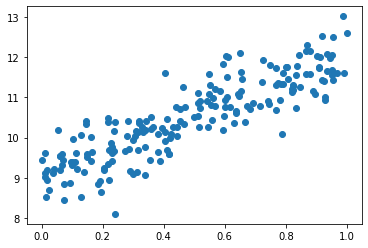

In [2]:
no_of_samples = 200
noice = np.random.randn(no_of_samples)

x = np.random.random([200,1])

y = 3*x[:,0]+ 9 + 0.5*noice

plt.scatter(x,y)

So we have created a dummy dataset where y = 5 * x + 6 + noice , 

now assume that this data was generated by some process and we only have x and y ,and other parameters needs to be found out.

# Linear Regression Using Normal Equation

Linear regression has a analytical solution which is: $\theta=(X^TX)^{-1}X^Ty\$

This can be used when data set is small and we can easily get inverse of matrix $X^TX$


In [3]:
X = np.stack([x[:,0] ,np.ones(200)],axis=1)

parameters = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)

parameters

array([2.99085989, 9.03820291])

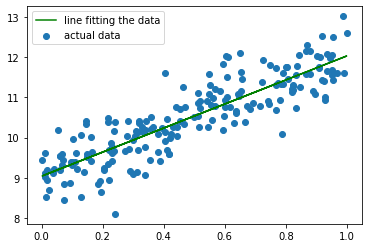

In [4]:
p1 = plt.scatter(x,y) 
p2 = plt.plot(x,parameters[0]*x+parameters[1],color='green')

plt.legend(('line fitting the data', 'actual data'))

### Limitations of using Normal Equation:
    
Normal Equation is computationally expensive when we have a huge number of features ( n features ),
It is of order $O(n^3)$
    
    
so If n is small we can use normal equation

# Linear Regression using Gradient Decent

we want a line that is fitting our data ,and that line can be written in form of:

$y_{predicted_{i}} = m *x_{i} +c$

and want to minimise MSE(mean square error):

$Loss = \frac{1}{N}*\sum_{i=1}^{N} (y_{actual_{i}}-y_{predicted_{i}})^2$ 

if we put $y_{predicted_{i}}$ in above equation we get:

$Loss = \frac{1}{N}*\sum_{i=1}^{N} (y_{actual_{i}}-m *x_{i} -c)^2$

we have to find m and c which minimises above loss . 
we can use gradient decent and updation will be 


$m = m -\lambda* \frac{\partial Loss}{\partial m} $

$c = c -\lambda* \frac{\partial Loss}{\partial m} $

if we put loss in above equation we will get:

$m = m +\lambda*\frac{1}{N}*\sum_{i=1}^{N} (y_{actual_{i}}-m *x_{i} -c)*x_{i}$

$c = c +\lambda*\frac{1}{N}*\sum_{i=1}^{N} (y_{actual_{i}}-m *x_{i} -c)$

in Vectorised format above equations can be written as:

$\begin{bmatrix}m \\ c \end{bmatrix}_{2x1}= \begin{bmatrix}m \\ c \end{bmatrix}_{2x1} + (\begin{bmatrix}y_{1} \\ y_{2} \\ \vdots \\ y_{N}\end{bmatrix}_{Nx1} - \begin{bmatrix}x_{1} & 1\\ x_{2} & 1 \\ \vdots \\ x_{N} & 1\end{bmatrix}_{Nx2}  * \begin{bmatrix}m \\ c \end{bmatrix}_{2x1})^T* \begin{bmatrix}x_{1} & 1\\ x_{2} & 1 \\ \vdots \\ x_{N} & 1\end{bmatrix}_{Nx2}$

In [5]:
def calculate_y(x,m,c):
    return m*x+c


def calulate_mse(y,x,m,c):
    sum_se = 0
    for index in range(x.shape[0]):
        y_calculated = calculate_y(x[index,0],m,c)
        se = (y_calculated-y[index])**2
        sum_se = sum_se + se
    return sum_se/x.shape[0]

def linear_regression(x,y,learning_rate):
    m = np.random.rand()
    c = np.random.rand()
    mse = []

    for i in range(1000):
        update_m = 0
        update_c = 0
        for index in range(x.shape[0]):
            y_calculated = calculate_y(x[index,0],m,c)
            y_actual = y[index]
            update_m += (y_actual - y_calculated)*x[index]
            update_c += (y_actual - y_calculated)
        m += learning_rate*update_m
        c += learning_rate*update_c

        mse.append(calulate_mse(y,x,m,c))
    return [m,c],mse



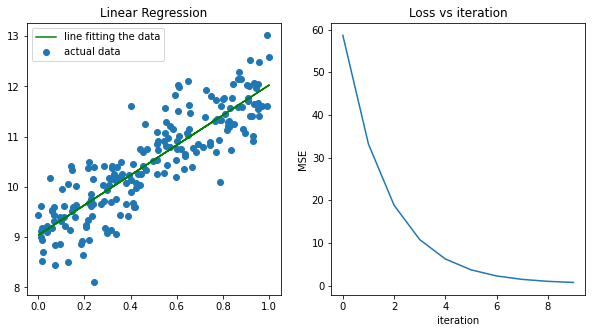

In [6]:
learning_rate = 0.001
[parameters,mse_1] = linear_regression(x,y,learning_rate)

m = parameters[0]
c = parameters[1]

plt.figure(figsize=(10,5))
plt.title('line fitting the data')
plt.subplot(121)
plt.plot(x,m*x+c,color='green')
plt.scatter(x, y)
plt.legend(('line fitting the data', 'actual data'))
plt.title('Linear Regression')


plt.subplot(122)
plt.plot(mse_1[:10])
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.title('Loss vs iteration')
plt.show()

In [7]:
# Linear Regression using Gradient Decent with Vactorised operations
m = 0
c = 0

for i in range(1000):
    [[m,c]] = [[m,c]]+ 0.001*np.dot((y.reshape(y.shape[0],1)-np.dot(np.stack([x[:,0] ,np.ones(200)]).T,np.array([[m],[c]]))).T,np.stack([x[:,0] ,np.ones(200)]).T)

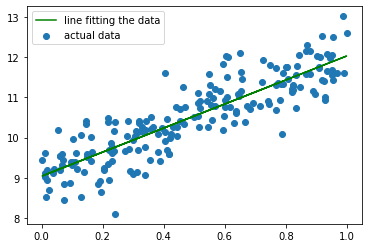

In [8]:
p1 = plt.scatter(x,y) 
p2 = plt.plot(x,m*x+c,color='green')

plt.legend(('line fitting the data', 'actual data'))

## Limitations of Linear regression:
    1.Linear Regression Is Limited to Linear Relationships
    2.Linear Regression Is Sensitive to Outliers
    3.Data Must Be Independent (does poorly on correlated features)